In [1]:
import pdftotext
import nltk
from nltk.corpus import stopwords
import pandas as pd
from pathlib import Path

In [ ]:
# text tokenization
#nltk.download('punkt')

# stopwords
#nltk.download('stopwords')

***
***
## Process a directory of PDF

In [3]:
# adjust directory to point to location of files
directory = 'test_pdf/'

# create file list of pdf in directory
pdf_folder = Path(directory).rglob('*.pdf')

# create list of files and verify contents
# should be 5 if using supplied 'test_pdf' directory
files = [file for file in pdf_folder]
files

[PosixPath('test_pdf/MedvedevaEtAl2019.pdf'),
 PosixPath('test_pdf/KDD97-003.pdf'),
 PosixPath('test_pdf/P99-1001.pdf'),
 PosixPath('test_pdf/10.1007978-3-319-67056-018.pdf'),
 PosixPath('test_pdf/dummy_test.pdf')]

## Iterate through each file and
* Tokenize file text
* Create consistent case `.lower()` for each token
* Remove tokens from `nltk` library `english` stopwords
* Remove non-`.isalpha()` tokens

In [4]:
tokens = []
stopWords = set(stopwords.words('english'))

# iterate every file in directory
for file in files:
    # open file
    with open(file, 'rb') as f:
        # conversion with pdftotext
        multi_pdf = pdftotext.PDF(f)
        # place current pdf text into list of tokens
        tokens += nltk.word_tokenize(''.join(multi_pdf))

# update tokens by setting all to lowercase,
# removing stopwords,
# removing non-alphanumeric
tokens_removed = [word.lower() for word in tokens
                  if word.lower() not in stopWords
                  and word.isalpha()]

## verify removal of stopwords by displaying initial `token` lenght, `tokens_removed` length and difference of values

In [5]:
len(tokens), len(tokens_removed), len(tokens)-len(tokens_removed)

(45703, 20387, 25316)

***
***
## user directed word search
* alter `words` list to include desired search terms as list of type string

In [ ]:
# initialize user summary list
words = [""]
word_summary = []
# create list with sublist [word, count]
for word in range(len(words)):
    word_summary.append([words[word], nltk.Text(tokens).count(words[word])])

## user specifies 5 words
* utilizes `pandas` library to create dataframe of `word` and `count` as well as simple bar graph

In [ ]:
df_multi = pd.DataFrame(word_summary, columns = ["word", "count"])
df_multi

In [ ]:
df_multi.plot.bar(x='word', y='count')

***
***

## NLTK provides top 5
* This allows the data to drive further work by looking solely at the top N words in the files processed.
* By default the tokens are cleaned by removing `tokens` in the `nltk` library `stopwords` English list, as well as punctuation and non-alphanumeric `tokens` from the `string` methods.
* `nltk` directed search allows the opportunity for supervised follow-up utilizing inference from `tokens` provided and additional user input to narrow in on "hits" in the dataset.
* Since `most_common()` method provides all entries it can be indexed as a traditional list to look anywhere in the list if desired.
 * Alternately `most_common(n)` can be used where `n` is the number of words to search for if concerned about slowdown via processing too many tokens.

### create a frequencity distribution based off of the cleaned tokens

In [6]:
fd = nltk.FreqDist(tokens_removed)

### `most_common(n)` provides a list of `n` length with sublist `[word, count]`
### create a dataframe utilizing the 5 most common words in the cleaned token list

In [113]:
n = 10

In [114]:
data = fd.most_common()
df_fd = pd.DataFrame(data[:n], columns = ["word", "count"])
df_fd

,word,count
0,text,255
1,data,238
2,mining,195
3,information,153
4,cases,150
5,articles,124
6,learning,111
7,results,111
8,case,110
9,used,108


### create a simple bar graph of top `n` words vs count

<AxesSubplot:xlabel='word'>

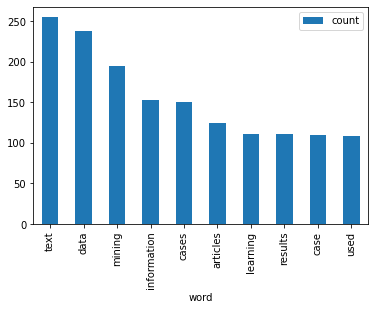

In [115]:
df_fd.plot.bar(x='word', y='count')

***
***
# TO-DO
### immediate
* clustering method
 * tf-idf on each PDF then cull to look at score for top `n` words?

### long-term
* Look into API for digital commons
* Adjust visualizations
***
***

### THIS TAKES A LONG TIME!
### IT IS ALL THE TOKENS!
### (not a good idea)

In [91]:
#nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens_removed)

In [92]:
tagged

[('page', 'NN'),
 ('containing', 'VBG'),
 ('authors', 'NNS'),
 ('details', 'NNS'),
 ('noname', 'JJ'),
 ('manuscript', 'RB'),
 ('inserted', 'VBN'),
 ('editor', 'NN'),
 ('using', 'VBG'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('predict', 'JJ'),
 ('decisions', 'NNS'),
 ('european', 'JJ'),
 ('court', 'NN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('masha', 'NN'),
 ('medvedeva', 'NN'),
 ('michel', 'NN'),
 ('vols', 'NNS'),
 ('martijn', 'VBP'),
 ('wieling', 'VBG'),
 ('abstract', 'NN'),
 ('courts', 'NNS'),
 ('started', 'VBD'),
 ('publishing', 'VBG'),
 ('judgements', 'NNS'),
 ('big', 'JJ'),
 ('data', 'NNS'),
 ('analysis', 'NN'),
 ('scale', 'NN'),
 ('statistical', 'JJ'),
 ('analysis', 'NN'),
 ('case', 'NN'),
 ('law', 'NN'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('within', 'IN'),
 ('legal', 'JJ'),
 ('domain', 'NN'),
 ('became', 'VBD'),
 ('possible', 'JJ'),
 ('taking', 'VBG'),
 ('data', 'NNS'),
 ('european', 'JJ'),
 ('court', 'NN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('ample', 'NN'),
 

In [ ]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities

***
### Look instead at `tagged` and `entities` from the top N words only

In [209]:
target_words = sorted(fd, key = fd.get, reverse = True)[:n]

In [210]:
tagged = nltk.pos_tag(target_words)
tagged

[('text', 'NN'),
 ('data', 'NNS'),
 ('mining', 'NN'),
 ('information', 'NN'),
 ('cases', 'NNS'),
 ('articles', 'VBZ'),
 ('learning', 'VBG'),
 ('results', 'NNS'),
 ('case', 'NN'),
 ('used', 'VBN')]

## `pos_tag` codes: https://www.guru99.com/pos-tagging-chunking-nltk.html

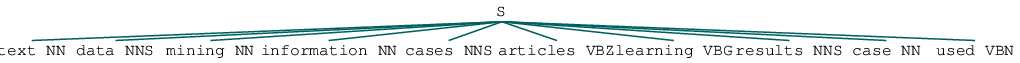

In [211]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [212]:
type(tagged), tagged, type(entities), entities

(list,
 [('text', 'NN'),
  ('data', 'NNS'),
  ('mining', 'NN'),
  ('information', 'NN'),
  ('cases', 'NNS'),
  ('articles', 'VBZ'),
  ('learning', 'VBG'),
  ('results', 'NNS'),
  ('case', 'NN'),
  ('used', 'VBN')],
 nltk.tree.Tree,
 Tree('S', [('text', 'NN'), ('data', 'NNS'), ('mining', 'NN'), ('information', 'NN'), ('cases', 'NNS'), ('articles', 'VBZ'), ('learning', 'VBG'), ('results', 'NNS'), ('case', 'NN'), ('used', 'VBN')]))

***
## TF-IDF tests
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [213]:
len(target_words), len(tokens_removed), type(target_words), type(tokens_removed)

(10, 20387, list, list)

In [214]:
bagOfWordsA = target_words
bagOfWordsB = tokens_removed

uniqueWords = set(bagOfWordsB).union(set(bagOfWordsB))

numOfWordsA = dict.fromkeys(uniqueWords, 0)

for word in bagOfWordsA:
    numOfWordsA[word] += 1

    numOfWordsB = dict.fromkeys(uniqueWords, 0)
    
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [215]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [216]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [217]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [218]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

In [219]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [220]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)

df1 = pd.DataFrame([tfidfA, tfidfB])
df1

,instruments,recognises,issued,questionnaire,educators,outperforms,sukanya,graph,click,deshpande,...,multilevel,europe,unicom,short,ii,contained,manuscript,seminar,models,correlating
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000034,0.000034,0.000102,0.000034,0.000034,0.000034,0.000034,0.002516,0.000034,0.000034,...,0.000034,0.000068,0.000068,0.000102,0.000238,0.000034,0.000068,0.000034,0.002448,0.000034


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* take unique tokens from each pdf being fed as input
* store each token as a string in the corpus

In [229]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
          documentA]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,and,articles,case,cases,data,document,first,information,is,learning,mining,one,results,second,text,the,third,this,used
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.467561,0.563265,0.000000,0.393327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393327,0.000000,0.393327,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.692021,0.000000,0.000000,0.291075,0.000000,0.000000,0.000000,0.000000,0.516656,0.000000,0.291075,0.000000,0.291075,0.000000
2,0.503015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283390,0.000000,0.000000,0.503015,0.000000,0.000000,0.000000,0.283390,0.503015,0.283390,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.467561,0.563265,0.000000,0.393327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393327,0.000000,0.393327,0.000000
4,0.000000,0.316228,0.316228,0.316228,0.316228,0.000000,0.000000,0.316228,0.000000,0.316228,0.316228,0.000000,0.316228,0.000000,0.316228,0.000000,0.000000,0.000000,0.316228


In [230]:
dropped_columns = list(set(feature_names).difference(target_words))
df.drop(columns = dropped_columns)

,articles,case,cases,data,information,learning,mining,results,text,used
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228


In [224]:
sorted(target_words)

['articles',
 'case',
 'cases',
 'data',
 'information',
 'learning',
 'mining',
 'results',
 'text',
 'used']

In [225]:
documentA = ''
documentB = ''
for word in target_words:
    documentA += word+' '
for word in tokens_removed:
    documentB += word+' '

In [226]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,aa,aaai,aaamg,aams,ab,abbreviations,abdel,abdurrahim,abilities,ability,...,ﬁgure,ﬁles,ﬁltered,ﬁltering,ﬁnancial,ﬁnd,ﬁnding,ﬁndings,ﬁnds,ﬁrst
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000
1,0.00136,0.00816,0.00136,0.00136,0.00136,0.00136,0.00136,0.00272,0.00136,0.00272,...,0.00136,0.00272,0.00272,0.00272,0.00136,0.0068,0.00816,0.00408,0.00136,0.00408


In [227]:
dropped_columns = list(set(feature_names).difference(target_words))
df2.drop(columns = dropped_columns)

,articles,case,cases,data,information,learning,mining,results,text,used
0,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228
1,0.119992,0.106445,0.145152,0.230307,0.148055,0.107412,0.188697,0.107412,0.246758,0.104509
